# Analyze the perturbed feature map

In [2]:
import os
import glob
import torch
import random
import numpy as np
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

## weights of linear classifier

In [2]:
w1_path = "/DB/data/yanghengzhao/adversarial/DAMC/zhenxiang/classifier/checkpoints/linear/N01_E1e-01_S10_sparse/classifier.pth"
w2_path = "/DB/data/yanghengzhao/adversarial/DAMC/zhenxiang/classifier/checkpoints/linear/N01_E5e-01_S10_sparse/classifier.pth"

In [10]:
# 0: normal, 1: perturbed
w1 = torch.load(w1_path, map_location="cpu")
w2 = torch.load(w2_path, map_location="cpu")

In [11]:
w1 = w1['fc.weight'][1] - w1['fc.weight'][0]

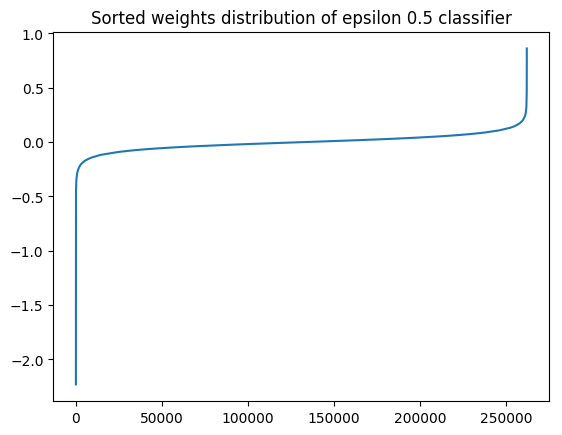

In [12]:
plt.title("Sorted weights distribution of epsilon 0.5 classifier")
plt.plot(w1.sort()[0].cpu().numpy())
plt.show()

In [13]:
s1 = set(torch.where(w1 > 0.1)[0].cpu().numpy().tolist())
print(len(s1))

19029


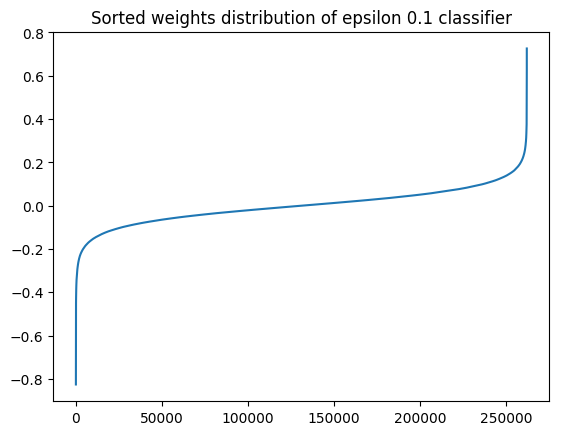

In [14]:
w2 = w2['fc.weight'][1] - w2['fc.weight'][0]
plt.title("Sorted weights distribution of epsilon 0.1 classifier")
plt.plot(w2.sort()[0].cpu().numpy())
plt.show()

In [15]:
s2 = set(torch.where(w2 > 0.1)[0].cpu().numpy().tolist())
print(len(s2))

25364


In [16]:
s1 & s2

{131073,
 73729,
 65539,
 237570,
 147457,
 24577,
 180231,
 24584,
 213002,
 131083,
 73740,
 17913,
 14,
 196624,
 180241,
 147478,
 180249,
 32796,
 139294,
 65567,
 163872,
 204833,
 17917,
 90145,
 73764,
 40999,
 114727,
 73769,
 245799,
 90151,
 90154,
 24620,
 163897,
 180287,
 163905,
 163906,
 237634,
 24641,
 221254,
 114759,
 114762,
 172119,
 163934,
 139359,
 237664,
 24670,
 188511,
 237667,
 24674,
 163941,
 237670,
 237671,
 221285,
 131177,
 106,
 73834,
 245866,
 213101,
 221289,
 24685,
 24697,
 24703,
 163970,
 237699,
 237700,
 229509,
 237701,
 114819,
 213127,
 213128,
 221318,
 229515,
 41099,
 73869,
 17938,
 24716,
 17939,
 17940,
 213146,
 17941,
 221340,
 163997,
 237729,
 123041,
 164005,
 237734,
 221350,
 131242,
 73898,
 73900,
 204972,
 172214,
 221371,
 41148,
 237756,
 254143,
 237765,
 17950,
 73928,
 73929,
 17952,
 172243,
 213207,
 17953,
 164058,
 49372,
 17954,
 237792,
 221409,
 49382,
 221416,
 73961,
 221417,
 73971,
 49396,
 180469,
 164094

In [17]:
w2.shape

torch.Size([262144])

In [19]:
w2_np = w2.reshape(256, 32, 32).numpy()

In [21]:
w2_np[w2_np < 0] = 0

In [22]:
w2_np.max()

0.7261762

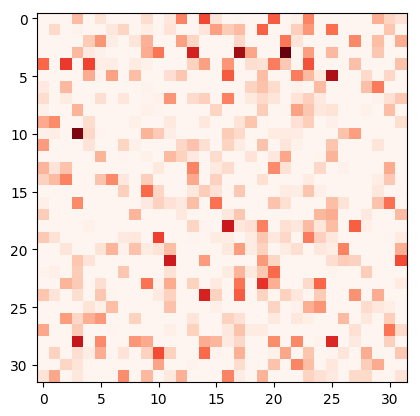

In [34]:
plt.imshow(w2_np[0], cmap='Reds')
plt.show()

In [80]:
cmap = matplotlib.cm.get_cmap("Reds")
colored_w2 = cmap(w2_np)
template = np.zeros((33 * 16, 33 * 16, 4))

In [81]:
for x in range(16):
    for y in range(16):
        template[x * 33:x * 33 + 32, y * 33:y * 33 + 32] = colored_w2[x * 16 + y]
        # template[x * 33:x * 33 + 32, y * 33:y * 33 + 32] = 1
        # break
    # break
img = (template[:, :, :3]*255).astype(np.uint8)


In [82]:
img = Image.fromarray(img)
img.save("weights.png")

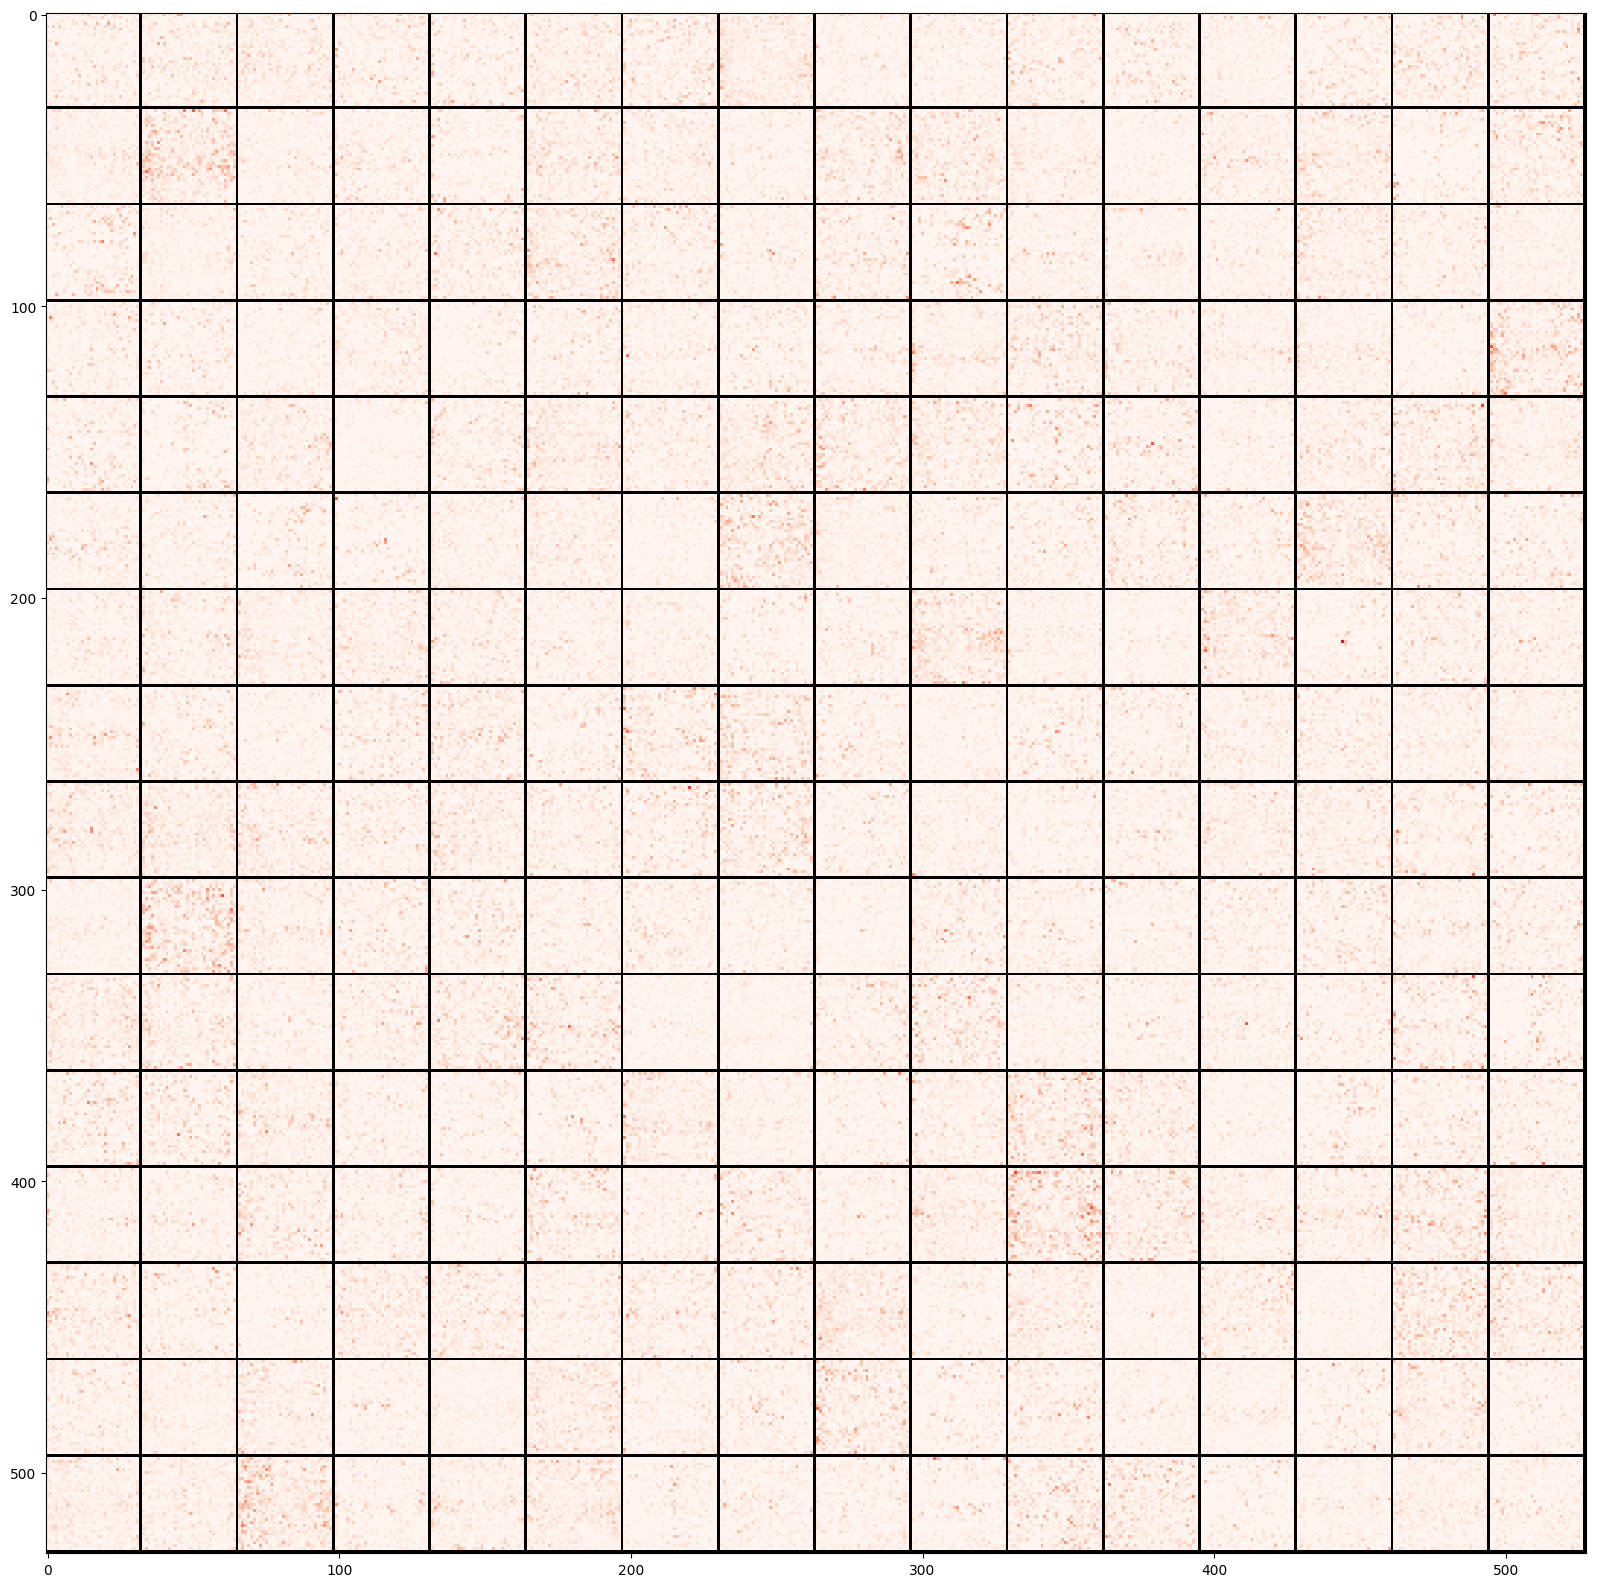

In [75]:
plt.figure(figsize=(20, 20))
plt.imshow(template[:, :, :3])
plt.show()

(1.0, 0.9607843137254902, 0.9411764705882353, 1.0)

In [17]:
def visualize_weights(file):
    w = torch.load(file, map_location="cpu")
    w = w['fc.weight'][1] - w['fc.weight'][0]
    w_np = w.reshape(256, 32, 32).numpy()
    w_np = np.abs(w_np)
    # w_np[w_np < 0] = 0
    threshold = np.percentile(w_np, 90)
    w_np[w_np < threshold] = 0
    w_np /= w_np.max()
    cmap = matplotlib.cm.get_cmap("hot")
    colored_w = cmap(1 - w_np)
    template = np.zeros((33 * 16, 33 * 16, 4))
    for x in range(16):
        for y in range(16):
            template[x * 33:x * 33 + 32, y * 33:y * 33 + 32] = colored_w[x * 16 + y]
    img = (template[:, :, :3] * 255).astype(np.uint8)
    return img

In [18]:
img1 = visualize_weights("/DB/data/yanghengzhao/adversarial/DAMC/zhenxiang/classifier/checkpoints/linear/N01_E5e-01_S10_sparse/classifier.pth")
img2 = visualize_weights("/DB/data/yanghengzhao/adversarial/DAMC/zhenxiang/classifier/checkpoints/linear/N01_E5e-01_S10_sparse2/classifier.pth")
img3 = visualize_weights("/DB/data/yanghengzhao/adversarial/DAMC/zhenxiang/classifier/checkpoints/linear/N01_E5e-01_S10_sparse3/classifier.pth")

<Figure size 2000x2000 with 0 Axes>

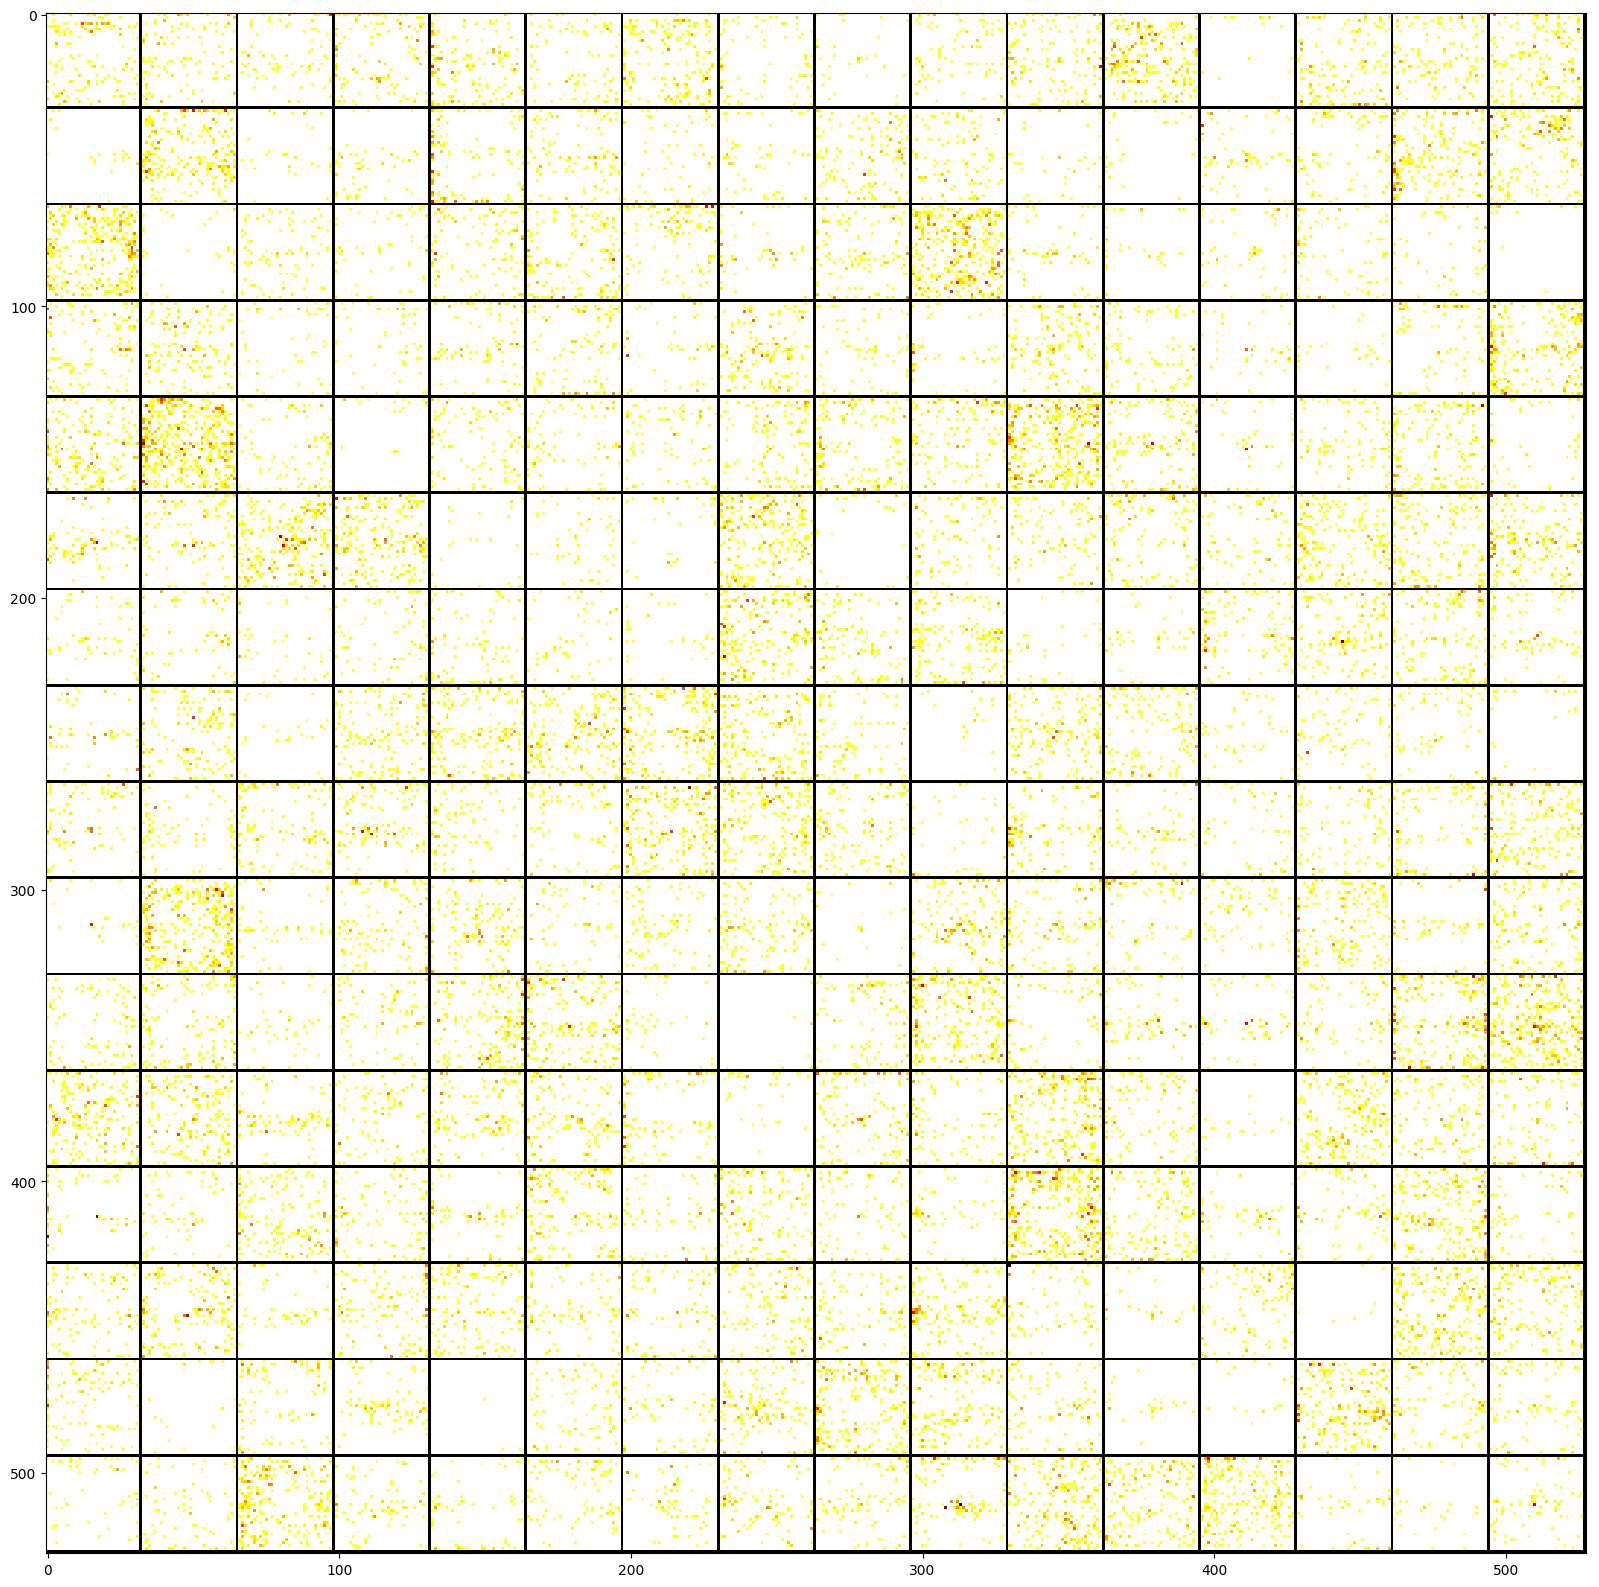

In [20]:
plt.figure(figsize=(20,20))
plt.imshow(img1)
plt.show()

In [21]:
Image.fromarray(img1).save("5e-01/weights1.png")
Image.fromarray(img2).save("5e-01/weights2.png")
Image.fromarray(img3).save("5e-01/weights3.png")

In [94]:
cmap(0)

(1.0, 0.9607843137254902, 0.9411764705882353, 1.0)

In [22]:
img4 = visualize_weights("/DB/data/yanghengzhao/adversarial/DAMC/zhenxiang/classifier/checkpoints/linear/N01_E1e-01_S10_sparse/classifier.pth")
img5 = visualize_weights("/DB/data/yanghengzhao/adversarial/DAMC/zhenxiang/classifier/checkpoints/linear/N01_E1e-01_S10_sparse2/classifier.pth")

In [23]:
Image.fromarray(img4).save("1e-01/weights1.png")
Image.fromarray(img5).save("1e-01/weights2.png")

In [3]:
loss_curves = glob.glob("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/attack_loss/N01_E5e-01_S10_sparse/*.pt")

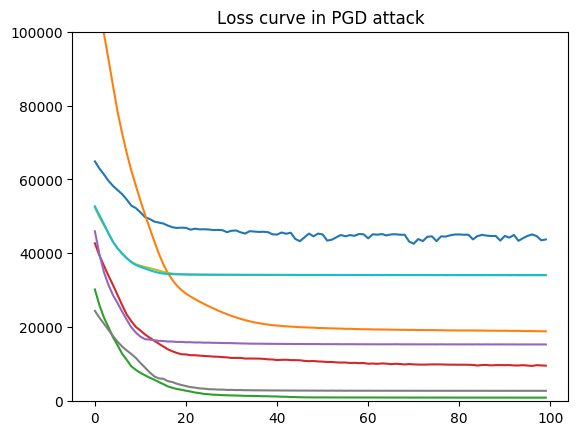

In [6]:
plt.title("Loss curve in PGD attack")
for loss_curve in random.sample(loss_curves, 10):
    x = torch.load(loss_curve, map_location="cpu")
    plt.plot(x)
plt.ylim([-100, 1e5])
plt.show()

In [7]:
feat_files = glob.glob("/DB/data/yanghengzhao/adversarial/disco_features/test/normal/*.pth")

In [8]:
v_max_normal = []
v_min_normal = []
for f in feat_files:
    feat = torch.load(f, map_location="cpu")
    feat = feat.numpy()
    v_max_normal.append(np.percentile(feat, 99))
    v_min_normal.append(np.percentile(feat, 1))
    # print(v_max, v_min)
    # break

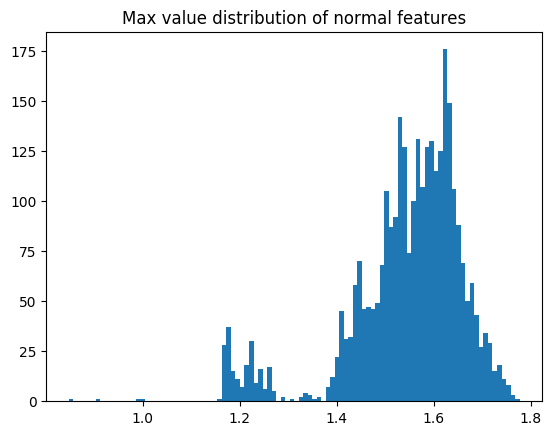

In [27]:
plt.title("Max value distribution of normal features")
plt.hist(v_max_normal, bins=100)
plt.show()

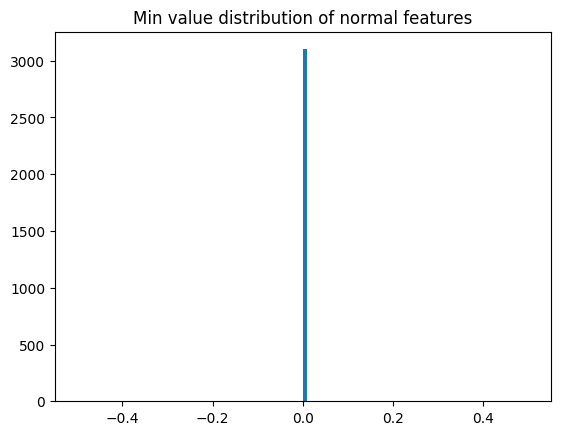

In [29]:
plt.title("Min value distribution of normal features")
plt.hist(v_min_normal, bins=100)
plt.show()

100%|██████████| 3100/3100 [03:30<00:00, 14.73it/s]


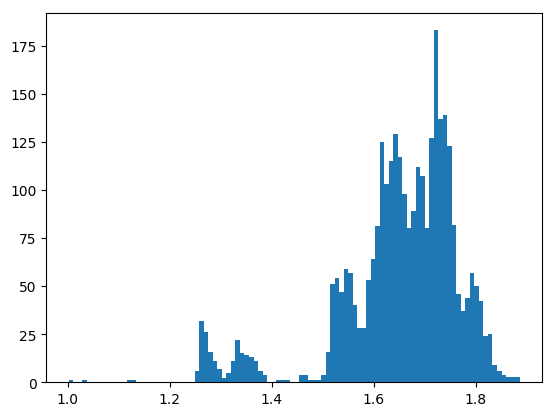

In [10]:
perturbed_files = glob.glob("/DB/data/yanghengzhao/adversarial/disco_features/test/N01_E5e-01_S10_sparse/*.pth")
v_max = []
v_min = []
for f in tqdm(perturbed_files):
    feat = torch.load(f, map_location="cpu")
    feat = feat.numpy()
    v_max.append(np.percentile(feat, 99))
    v_min.append(np.percentile(feat, 1))

plt.title("Max value distribution of perturbed features")
plt.hist(v_max, bins=100)
plt.show()

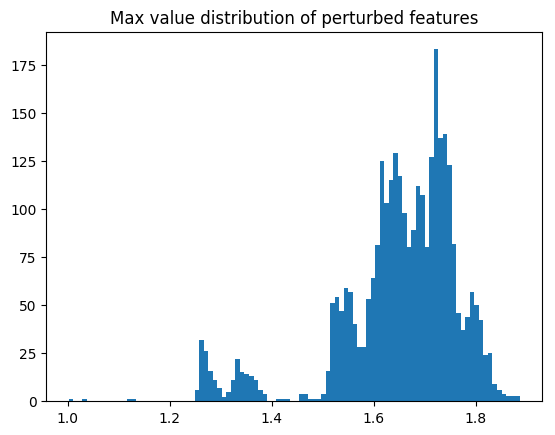

In [28]:

plt.hist(v_max, bins=100)
plt.show()

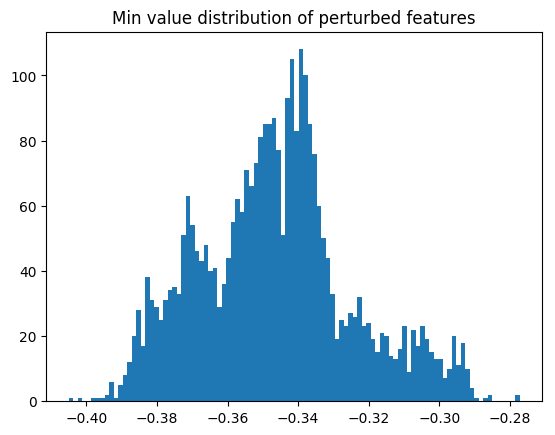

In [26]:
plt.title("Min value distribution of perturbed features")
plt.hist(v_min, bins=100)
# plt.hist(v_min_normal, bins=100)
plt.show()

In [14]:
(np.array(v_min) < 0).sum()

3100